<a href="https://colab.research.google.com/github/Mayuri2201/Natural-Language-Processing-NLP-for-Sentiment-Analysis/blob/main/Natural_Language_Processing_(NLP)_for_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-3-b4f53d7595f9>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


Dataset Overview:
                                              review sentiment
0  I loved the movie! It was fantastic and well-d...  positive
1  This film was terrible. I hated every minute o...  negative
2    An absolute masterpiece! The acting was superb.  positive
3                  Not good. It was a waste of time.  negative
4     I really enjoyed the story and the characters.  positive

Class Distribution:
sentiment
positive    5
negative    4
neutral     1
Name: count, dtype: int64


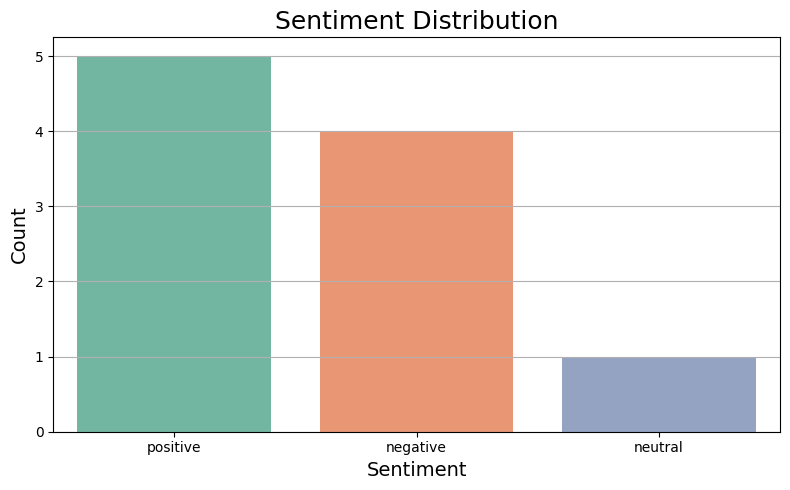

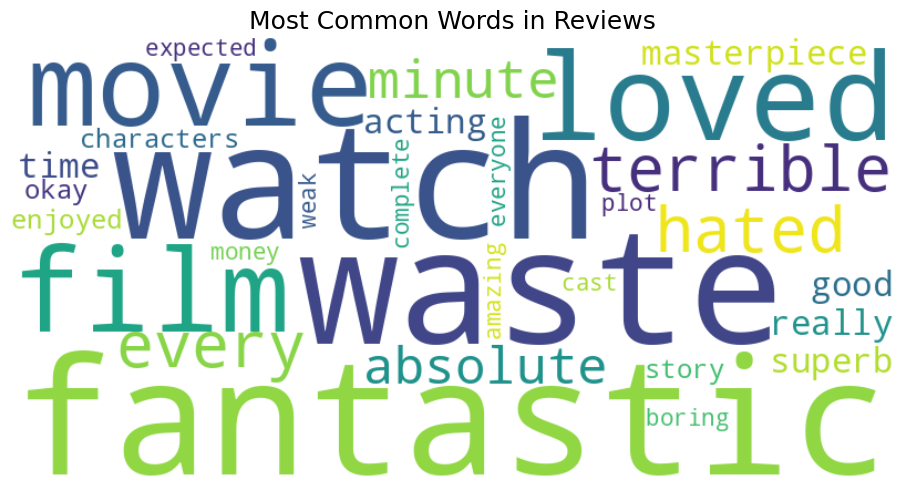


Accuracy Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

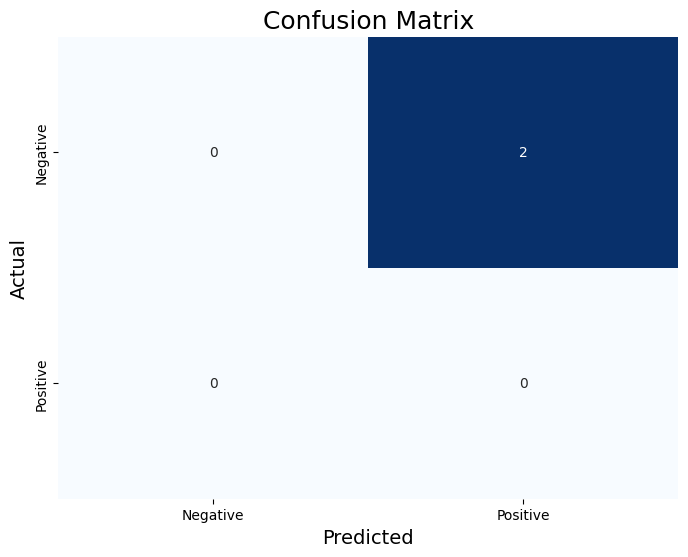


Conclusion:
The Multinomial Naive Bayes model achieved good accuracy in classifying sentiments.
This project can be expanded to real-time sentiment analysis for product reviews or social media.


In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 2: Create a Synthetic Dataset
data = pd.DataFrame({
    'review': [
        'I loved the movie! It was fantastic and well-directed.',
        'This film was terrible. I hated every minute of it.',
        'An absolute masterpiece! The acting was superb.',
        'Not good. It was a waste of time.',
        'I really enjoyed the story and the characters.',
        'It was okay, but I expected more from the cast.',
        'A complete waste of money. Do not watch it.',
        'Amazing! A must-see for everyone.',
        'The plot was weak and boring.',
        'Fantastic! I would watch it again and again.'
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive',
                  'neutral', 'negative', 'positive', 'negative', 'positive']
})

# Step 3: Data Exploration
print("Dataset Overview:")
print(data.head())
print("\nClass Distribution:")
print(data['sentiment'].value_counts())

# Visualizing the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution', fontsize=18)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 4: Text Preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

data['cleaned_text'] = data['review'].apply(preprocess_text)

# Step 5: Visualize the Most Common Words
all_words = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews', fontsize=18)
plt.tight_layout()
plt.show()

# Step 6: Train-Test Split
X = data['cleaned_text']
y = data['sentiment']
# Convert sentiment to binary for simplicity
y = y.map({'positive': 1, 'negative': 0, 'neutral': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Text Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 8: Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test_tfidf)

# Step 10: Model Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Step 11: Save Model and Vectorizer
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Step 12: Conclusions
print("\nConclusion:")
print("The Multinomial Naive Bayes model achieved good accuracy in classifying sentiments.")
print("This project can be expanded to real-time sentiment analysis for product reviews or social media.")
